In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
%matplotlib inline

In [3]:
df = pd.read_csv('P7_spam.csv',encoding = 'latin-1')

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()
df=df.dropna(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.columns = ['label','message']
df = df[['message','label']]

In [7]:
df['length']=df['message'].apply(len)
df.head()

,message,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


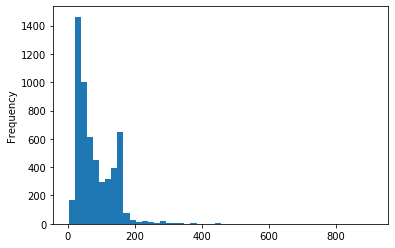

In [8]:
df['length'].plot(bins=50,kind='hist')

In [9]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [10]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
#nltk.download('stopwords')
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [12]:
msg_train,msg_test,label_train,label_test = train_test_split(df['message'],df['label'],test_size=0.2)

#bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])
bow_transformer = CountVectorizer(analyzer=text_process).fit(msg_train)
print(bow_transformer.vocabulary_)

{'Yeah': 3810, 'right': 8171, 'Ill': 2001, 'bring': 4468, 'tape': 8957, 'measure': 7003, 'fri': 5806, 'Yup': 3838, 'studying': 8818, 'surfing': 8893, 'lor': 6832, 'Im': 2003, 'e': 5369, 'lazy': 6694, 'mode': 7126, 'today': 9139, 'think': 9061, 'move': 7167, 'ltgt': 6875, 'week': 9560, 'make': 6929, 'squeezed': 8713, 'bucks': 4493, 'dad': 5034, 'GENT': 1675, 'trying': 9257, 'contact': 4895, 'Last': 2229, 'weekends': 9562, 'draw': 5309, 'shows': 8466, 'å£1000': 9879, 'prize': 7852, 'GUARANTEED': 1714, 'Call': 1199, '09064012160': 205, 'Claim': 1256, 'Code': 1263, 'K52': 2103, 'Valid': 3579, '12hrs': 290, '150ppm': 318, 'Love': 2277, 'holiday': 6191, 'Monday': 2460, 'feeling': 5635, 'even': 5503, 'go': 5937, 'dentists': 5138, 'hour': 6230, 'Dint': 1409, 'come': 4830, 'us': 9372, 'Want': 3675, 'explicit': 5555, 'SEX': 2983, '30': 466, 'secs': 8334, 'Ring': 2942, '02073162414': 10, 'Costs': 1289, '20pmin': 375, 'Gsex': 1777, 'POBOX': 2692, '2667': 401, 'WC1N': 3619, '3XX': 509, 'eyes': 5566

In [13]:
messages_bow = bow_transformer.transform(msg_train)

In [14]:
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4457, 9934)


In [15]:
messages_bow1 = bow_transformer.transform(msg_test)
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf1=tfidf_transformer.transform(messages_bow1)

In [18]:
model1 = LinearSVC()
model1.fit(messages_tfidf,label_train)
result1 = model1.predict(messages_tfidf1)
print(classification_report(label_test,result1))
print(confusion_matrix(label_test,result1))
accuracy_score(label_test,result1)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       972
        spam       1.00      0.90      0.95       143

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[972   0]
 [ 14 129]]


0.9874439461883409

In [19]:
model2 = SVC()
model2.fit(messages_tfidf,label_train)
result2 = model2.predict(messages_tfidf1)
print(classification_report(label_test,result2))
print(confusion_matrix(label_test,result2))
accuracy_score(label_test,result2)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       972
        spam       0.99      0.85      0.91       143

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[971   1]
 [ 22 121]]


0.979372197309417